In [39]:
!pip install pygame
!pip install Ipython

# Kuramoto Model using pygame and odeint.

Please end the simulation and then run the code for plots.

In [36]:
import pygame
import numpy as np
from scipy.integrate import odeint

# Set up parameters for the Kuramoto model
N = 60              # Number of oscillators
K = 8.0                # Coupling strength
omega = np.random.normal(0, 1, N)  # Natural frequencies
theta_0 = np.random.uniform(0, 2 * np.pi, N)  # Initial phases

# Pygame setup
pygame.init()

WIDTH, HEIGHT = 800, 800
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Kuramoto Model Simulation")
clock = pygame.time.Clock()
FPS = 30  # Frames per second

# Circle parameters
RADIUS = 200  # Radius of the circle
CENTER = (WIDTH // 2, HEIGHT // 2)  # Center of the circle
COLORS = [(255, 100, 100), (100, 100, 255), (100, 255, 100)]  # Colors for oscillators

# Kuramoto model differential equation
def kuramoto_model(theta, t, N, K, omega):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(np.sin(theta - theta[i]))
    return dtheta_dt

# Solve the Kuramoto model
t = np.linspace(0, 10, 1000)
theta_t = odeint(kuramoto_model, theta_0, t, args=(N, K, omega))

# Main simulation loop
running = True
time_step = 0

while running:
    screen.fill((0, 0, 0))  # Clear screen with black background

    # Draw the main circle
    pygame.draw.circle(screen, (255, 255, 255), CENTER, RADIUS, 2)

    # Update oscillator positions
    if time_step < len(theta_t) - 1:
        theta = theta_t[time_step]
        time_step += 1
    else:
        time_step = 0  # Loop the animation

    # Draw each oscillator on the circle
    for i in range(N):
        phase = theta[i]
        x = int(CENTER[0] + RADIUS * np.cos(phase))
        y = int(CENTER[1] + RADIUS * np.sin(phase))
        color = COLORS[i % len(COLORS)]
        pygame.draw.circle(screen, color, (x, y), 8)

    # Check for exit
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Update the display
    pygame.display.flip()
    clock.tick(FPS)  # Control the frame rate

pygame.quit()


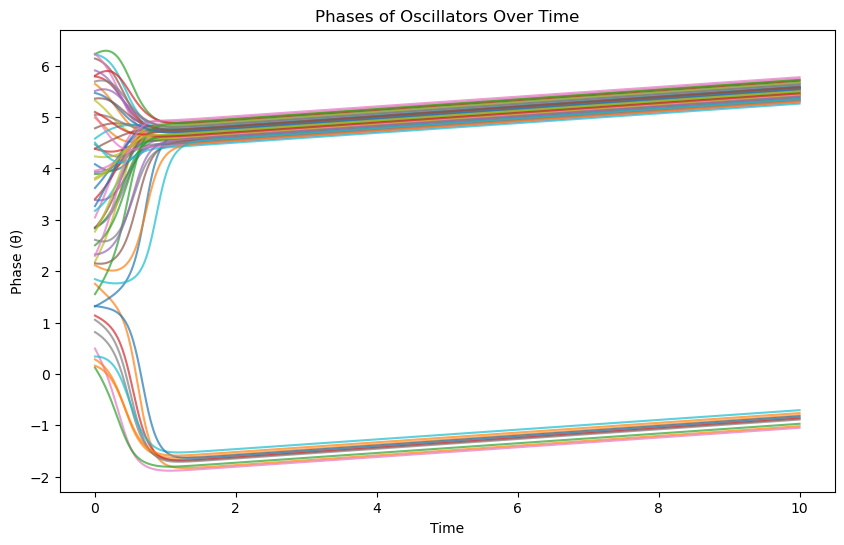

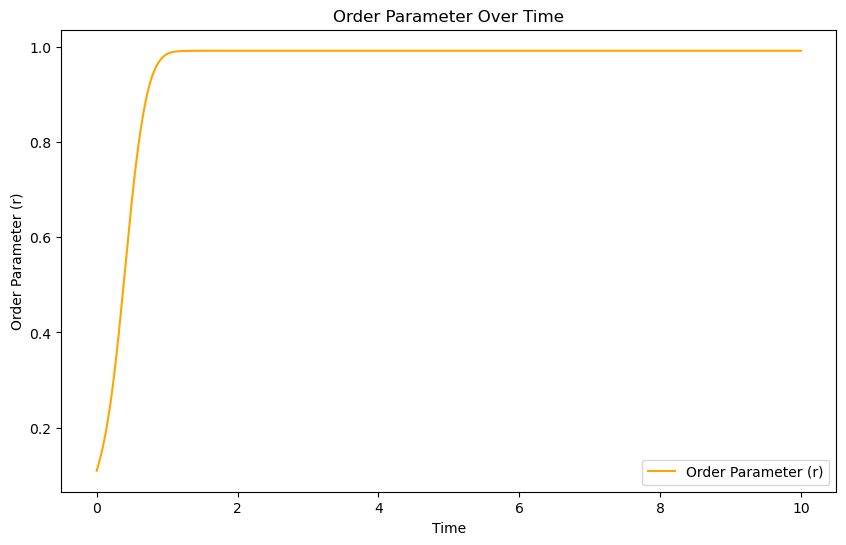

In [33]:
import matplotlib.pyplot as plt

# Plot the phase of each oscillator over time
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(t, theta_t[:, i], alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Phase (θ)")
plt.title("Phases of Oscillators Over Time")
plt.show()

# Calculate and plot the order parameter r(t)
r_values = np.abs(np.sum(np.exp(1j * theta_t), axis=1)) / N

plt.figure(figsize=(10, 6))
plt.plot(t, r_values, label="Order Parameter (r)", color="orange")
plt.xlabel("Time")
plt.ylabel("Order Parameter (r)")
plt.title("Order Parameter Over Time")
plt.legend()
plt.show()


# plots

In this plot, the phases of the most of the oscillators converge tightly at around 5 radians, suggesting strong synchronization among the oscillators. This high value of K and moderate value of N causes the or pushes the oscillators to align closely.

for a low value of K, the coupling will be very weak, and the phase will be more spread out

Also in the phase plot, you can observe that there are two seperate groups of phase converged at two points, this is basically partial synchroniszation, this can be happenning because high coupling strength beyond K can sometimes lead to clusters instead of full synchronization, as oscillators may form phase-locked clusters where groups synchronize at different phase offsets.

If you observe the order of parameter v/s the time plot, you can see the graph is getting stablized at r<1, that happens for partial synchronization, because  if there are multiple clusters with different average phases, the sum will have contributions in different directions on the complex plane, resulting in a smaller magnitude and thus r<1.


# r vs K graph

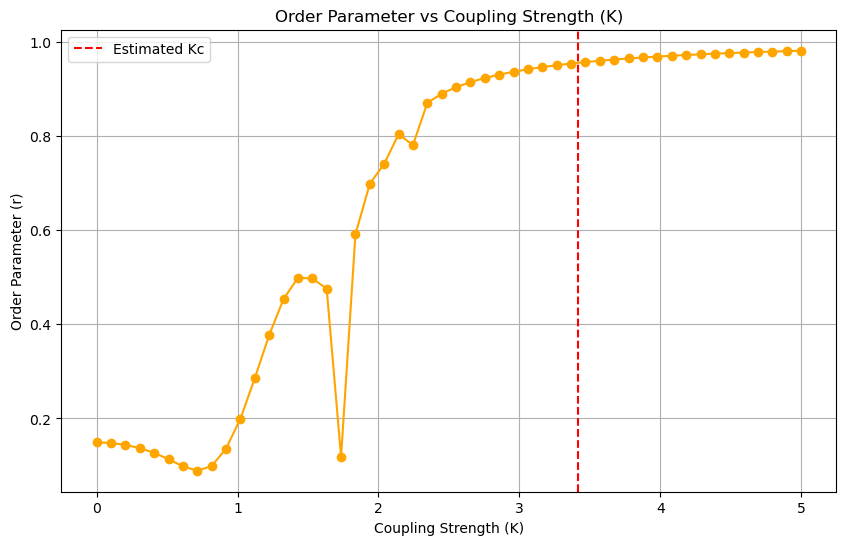

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Set up parameters for the post-simulation Kuramoto model
N = 50  # Number of oscillators
omega = np.random.normal(0, 1, N)  # Natural frequencies
theta_0 = np.random.uniform(0, 2 * np.pi, N)  # Initial phases
t = np.linspace(0, 10, 1000)  # Time array for integration

# Define the Kuramoto model
def kuramoto_model(theta, t, N, K, omega):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(np.sin(theta - theta[i]))
    return dtheta_dt

# Range of coupling strengths to test after pygame
K_values = np.linspace(0, 5, 50)  # Adjust range as needed
r_values = []

# Run the Kuramoto model for each K to calculate final order parameter r
for K in K_values:
    # Solve the Kuramoto model for this K
    theta_t = odeint(kuramoto_model, theta_0, t, args=(N, K, omega))
    
    # Calculate the order parameter r at the final time step
    r_t = np.abs(np.sum(np.exp(1j * theta_t), axis=1)) / N
    r_final = r_t[-1]  # Take the last value of r(t) as r_final for each K
    r_values.append(r_final)

# Plot r vs K
plt.figure(figsize=(10, 6))
plt.plot(K_values, r_values, marker='o', color='orange')
plt.xlabel("Coupling Strength (K)")
plt.ylabel("Order Parameter (r)")
plt.title("Order Parameter vs Coupling Strength (K)")
plt.axvline(x=np.mean(K_values[np.array(r_values) > 0.5]), color='red', linestyle='--', label="Estimated Kc")
plt.legend()
plt.grid()
plt.show()
#the red line indicates the Kc.

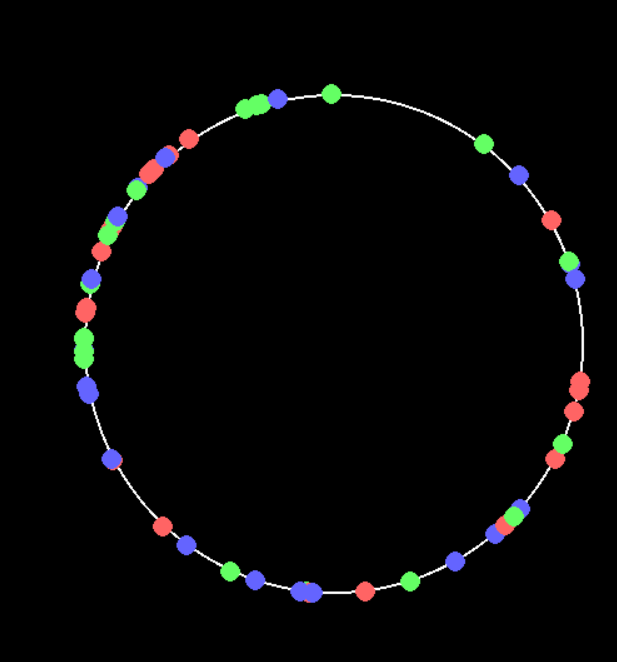

In [43]:
#if visualization of the pygame window not possible, then


from IPython.display import Image
Image(filename="C:\\Users\\91637\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-31 173717.png")

#in different phases, scattered all over

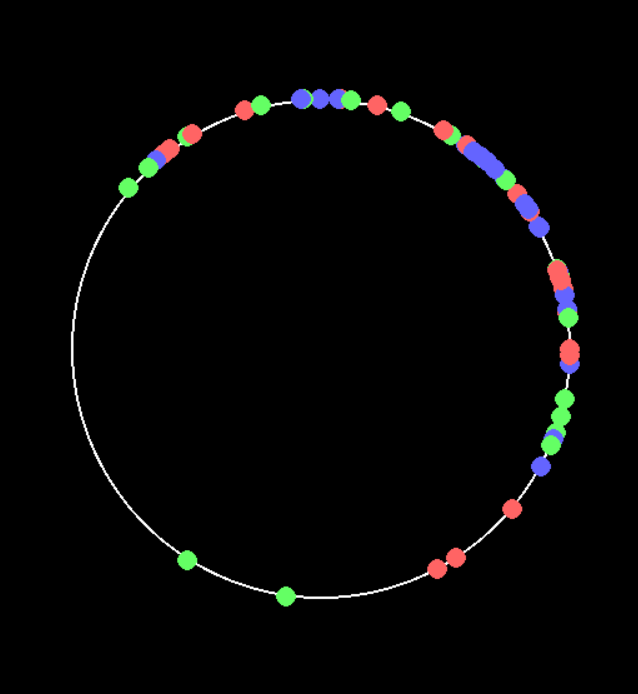

In [42]:
Image(filename="C:\\Users\\91637\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-31 173643.png")
#slowly getting synchronized

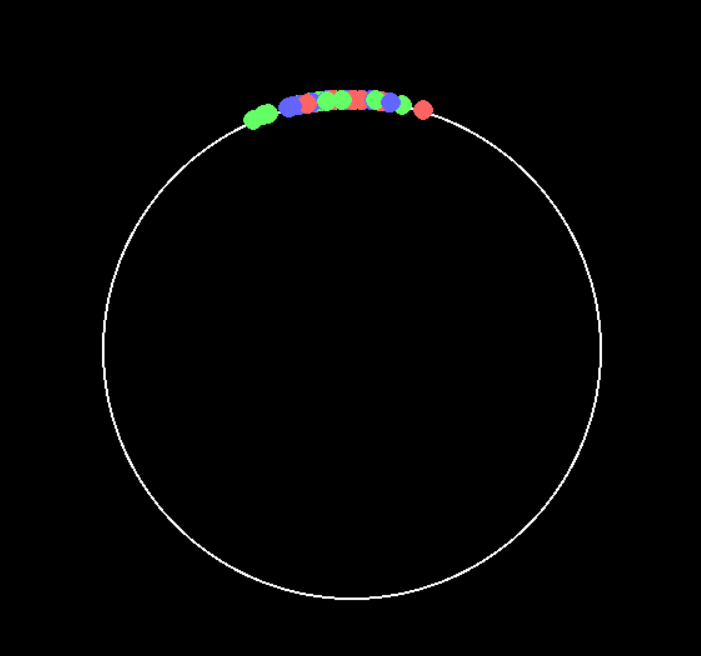

In [44]:
Image(filename="C:\\Users\\91637\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-10-31 173628.png")
#partially synchronized and moving together.